In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_regression,RFE


In [2]:
#load data 

listing = pd.read_csv ('C:/Users/prati/primeo/listing_for_modeling.csv')
print (f"orignal dataset shape :{listing.shape}")



orignal dataset shape :(20244, 28)


In [3]:
listing.describe()

,id,host_id,latitude,longitude,accommodates,bedrooms,bathrooms,square_feet,guests_included,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews
count,2.024400e+04,2.024400e+04,20244.000000,20244.000000,20244.000000,20230.000000,20237.000000,371.000000,20244.000000,20244.000000,20244.000000,17679.000000,20244.000000,20244.000000
mean,1.808811e+07,5.723730e+07,52.365332,4.889516,2.873938,1.452941,1.166873,542.272237,1.459593,3.440871,612.031516,95.017761,53.453122,23.933363
std,1.060356e+07,6.958410e+07,0.016311,0.035877,1.312887,0.893473,0.384678,537.492219,0.938560,16.000420,538.302503,6.600209,100.232752,50.091678
min,2.818000e+03,3.159000e+03,52.289270,4.759430,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000
25%,9.399229e+06,8.829702e+06,52.355150,4.863790,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,20.000000,93.000000,0.000000,3.000000
50%,1.782301e+07,2.612731e+07,52.364650,4.887000,2.000000,1.000000,1.000000,517.000000,1.000000,2.000000,1125.000000,97.000000,0.000000,9.000000
75%,2.624489e+07,7.657054e+07,52.375180,4.909240,4.000000,2.000000,1.000000,861.000000,2.000000,3.000000,1125.000000,100.000000,53.000000,23.000000
max,3.860032e+07,2.943184e+08,52.424710,5.027690,30.000000,12.000000,15.000000,3229.000000,16.000000,1001.000000,1825.000000,100.000000,365.000000,786.000000


In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20244 entries, 0 to 20243
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20244 non-null  int64  
 1   host_id                           20244 non-null  int64  
 2   host_name                         20239 non-null  object 
 3   host_is_superhost                 20239 non-null  object 
 4   host_identity_verified            20239 non-null  object 
 5   latitude                          20244 non-null  float64
 6   longitude                         20244 non-null  float64
 7   neighbourhood_cleansed            20244 non-null  object 
 8   price                             20244 non-null  object 
 9   property_type                     20244 non-null  object 
 10  room_type                         20244 non-null  object 
 11  accommodates                      20244 non-null  int64  
 12  bedr

In [5]:
listing.head(5)

,id,host_id,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood_cleansed,price,property_type,...,extra_people,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2818,3159,Daniel,t,f,52.36575,4.94142,Oostelijk Havengebied - Indische Buurt,$59.00,Apartment,...,$20.00,3,15,98.0,70,269,t,strict_14_with_grace_period,f,f
1,20168,59484,Alexander,f,f,52.36509,4.89354,Centrum-Oost,$80.00,Townhouse,...,$0.00,1,1000,88.0,167,288,f,strict_14_with_grace_period,f,f
2,25428,56142,Joan,f,f,52.37297,4.88339,Centrum-West,$125.00,Apartment,...,$10.00,14,60,100.0,58,3,f,strict_14_with_grace_period,f,f
3,27886,97647,Flip,t,t,52.38673,4.89208,Centrum-West,$155.00,Houseboat,...,$0.00,2,730,99.0,264,200,t,strict_14_with_grace_period,f,f
4,28871,124245,Edwin,t,t,52.36719,4.89092,Centrum-West,$75.00,Apartment,...,$0.00,2,1825,97.0,123,295,f,moderate,f,f


In [6]:
# Clean and convert currency-related columns
listing = listing.drop(['id', 'host_id'], axis=1)



In [7]:
listing.isnull().sum()

host_name                               5
host_is_superhost                       5
host_identity_verified                  5
latitude                                0
longitude                               0
neighbourhood_cleansed                  0
price                                   0
property_type                           0
room_type                               0
accommodates                            0
bedrooms                               14
bathrooms                               7
square_feet                         19873
security_deposit                     6053
cleaning_fee                         3611
guests_included                         0
extra_people                            0
minimum_nights                          0
maximum_nights                          0
review_scores_rating                 2565
availability_365                        0
number_of_reviews                       0
instant_bookable                        0
cancellation_policy               

In [8]:
numeric_cols = listing.select_dtypes(include=['number']).columns.tolist()
listing[numeric_cols] = listing[numeric_cols].fillna (listing[numeric_cols].median())

object_cols = listing.select_dtypes(include=['object']).columns.tolist()
listing[object_cols] = listing[object_cols].fillna (listing[object_cols].mode())

In [9]:
listing.isnull().sum()

host_name                              5
host_is_superhost                      5
host_identity_verified                 5
latitude                               0
longitude                              0
neighbourhood_cleansed                 0
price                                  0
property_type                          0
room_type                              0
accommodates                           0
bedrooms                               0
bathrooms                              0
square_feet                            0
security_deposit                    6053
cleaning_fee                        3611
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
review_scores_rating                   0
availability_365                       0
number_of_reviews                      0
instant_bookable                       0
cancellation_policy                    0
require_guest_pr

In [10]:

listing['security_deposit'] = listing['security_deposit'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
listing['cleaning_fee'] = listing['cleaning_fee'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)

# Now fill missing numeric values with median
numeric_cols = listing.select_dtypes(include=['number']).columns.tolist()
listing[numeric_cols] = listing[numeric_cols].fillna(listing[numeric_cols].median())

In [11]:
listing.isnull().sum()

host_name                           5
host_is_superhost                   5
host_identity_verified              5
latitude                            0
longitude                           0
neighbourhood_cleansed              0
price                               0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
bathrooms                           0
square_feet                         0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
availability_365                    0
number_of_reviews                   0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

In [12]:
listing.duplicated().sum()

0

In [13]:
listing[numeric_cols].describe()

,latitude,longitude,accommodates,bedrooms,bathrooms,square_feet,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews
count,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000,20244.000000
mean,52.365332,4.889516,2.873938,1.452628,1.166815,517.463150,201.738688,39.880656,1.459593,3.440871,612.031516,95.268919,53.453122,23.933363
std,0.016311,0.035877,1.312887,0.893244,0.384624,72.745751,310.878136,23.133149,0.938560,16.000420,538.302503,6.203039,100.232752,50.091678
min,52.289270,4.759430,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000
25%,52.355150,4.863790,2.000000,1.000000,1.000000,517.000000,100.000000,30.000000,1.000000,2.000000,20.000000,94.000000,0.000000,3.000000
50%,52.364650,4.887000,2.000000,1.000000,1.000000,517.000000,150.000000,40.000000,1.000000,2.000000,1125.000000,97.000000,0.000000,9.000000
75%,52.375180,4.909240,4.000000,2.000000,1.000000,517.000000,250.000000,50.000000,2.000000,3.000000,1125.000000,99.000000,53.000000,23.000000
max,52.424710,5.027690,30.000000,12.000000,15.000000,3229.000000,4736.000000,531.000000,16.000000,1001.000000,1825.000000,100.000000,365.000000,786.000000


analyzing:latitude


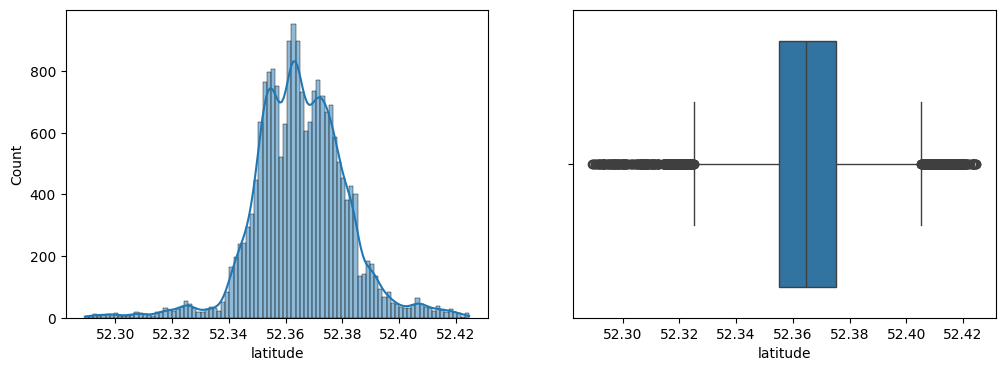

analyzing:longitude


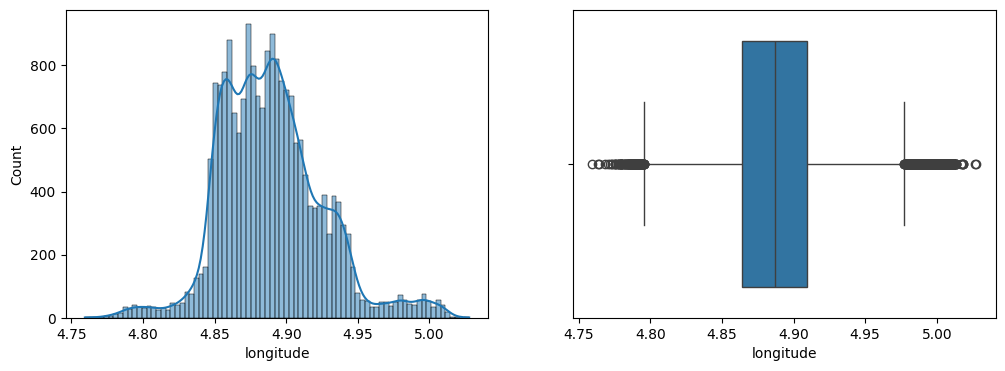

analyzing:accommodates


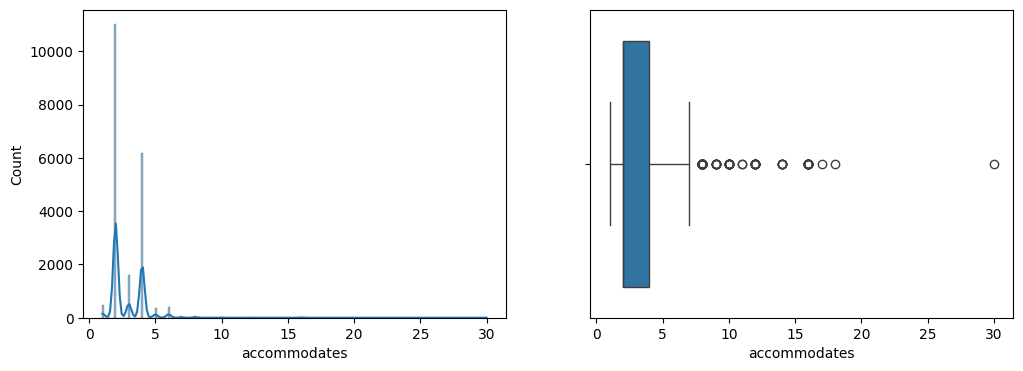

analyzing:bedrooms


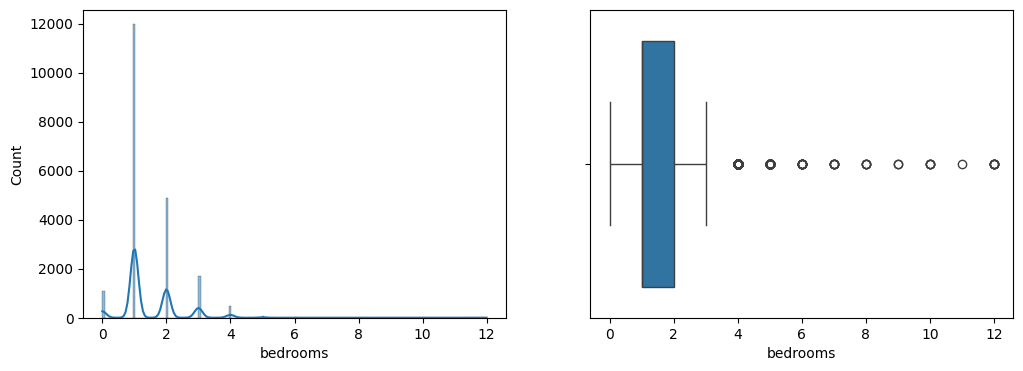

analyzing:bathrooms


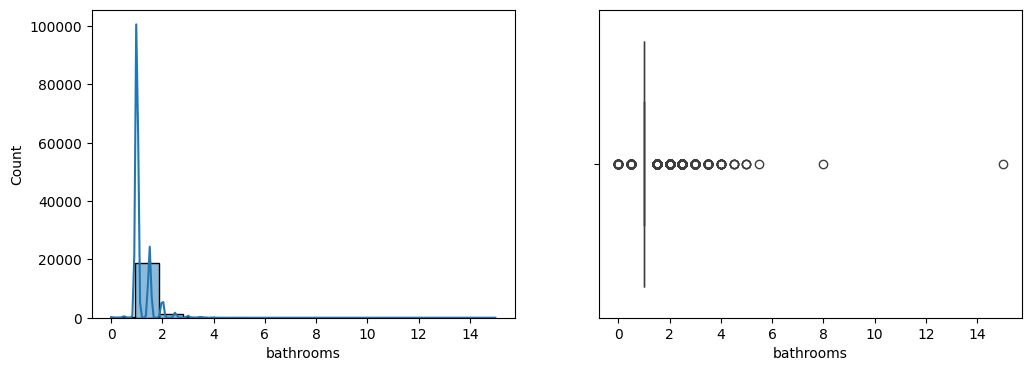

analyzing:square_feet


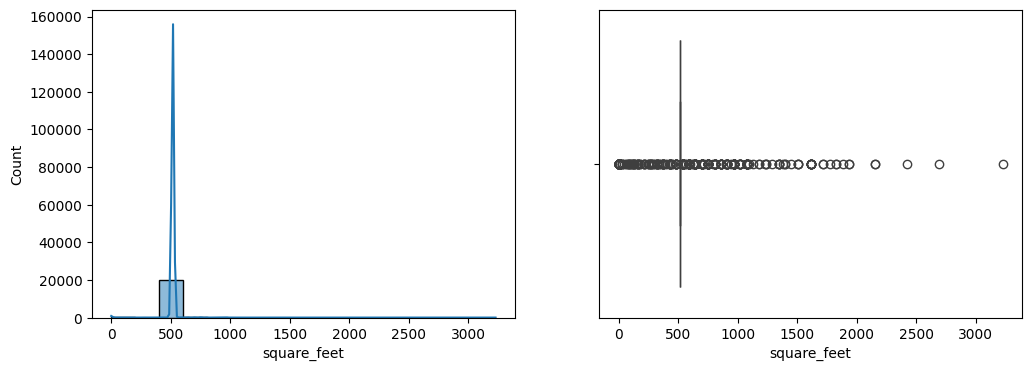

analyzing:security_deposit


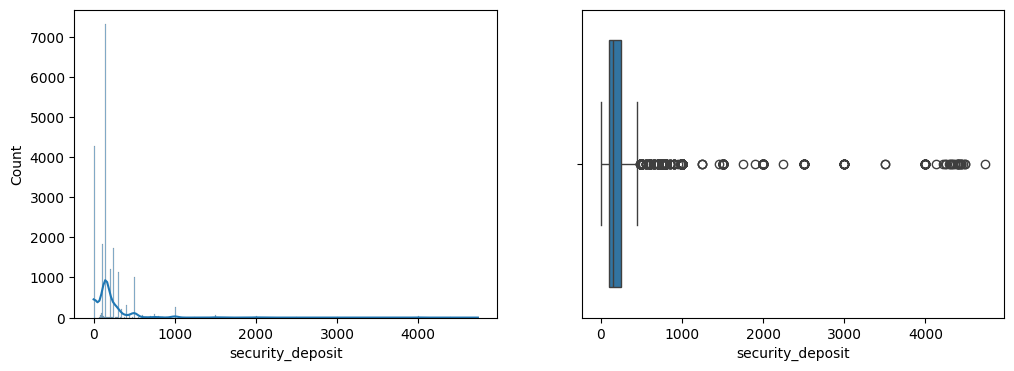

analyzing:cleaning_fee


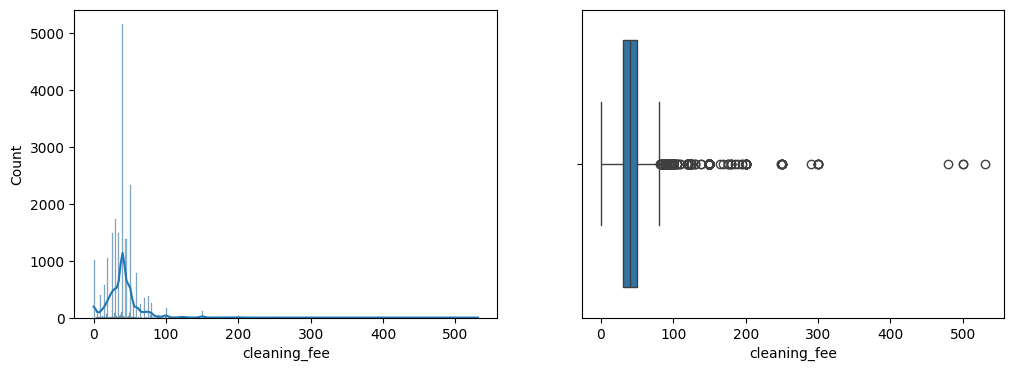

analyzing:guests_included


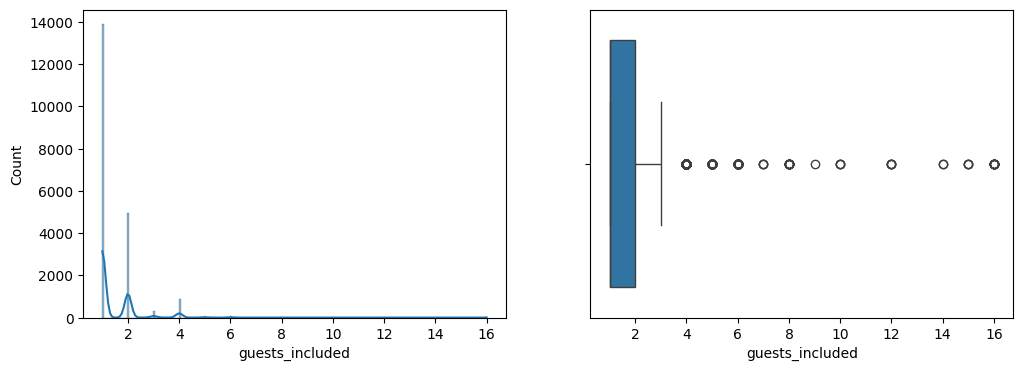

analyzing:minimum_nights


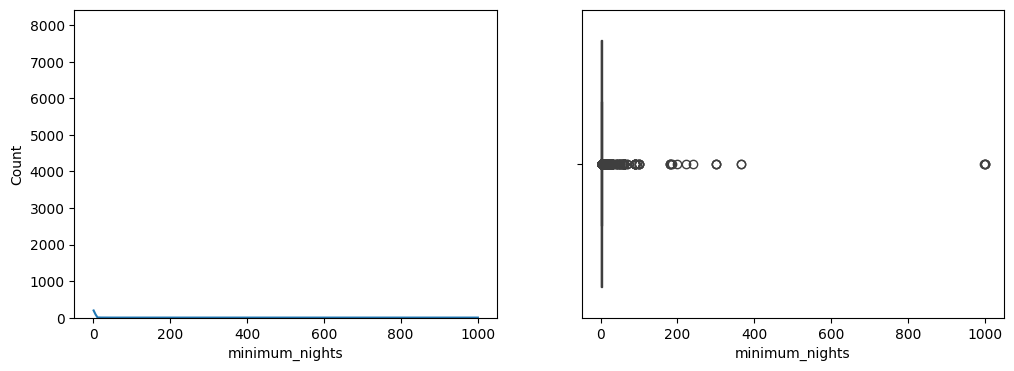

analyzing:maximum_nights


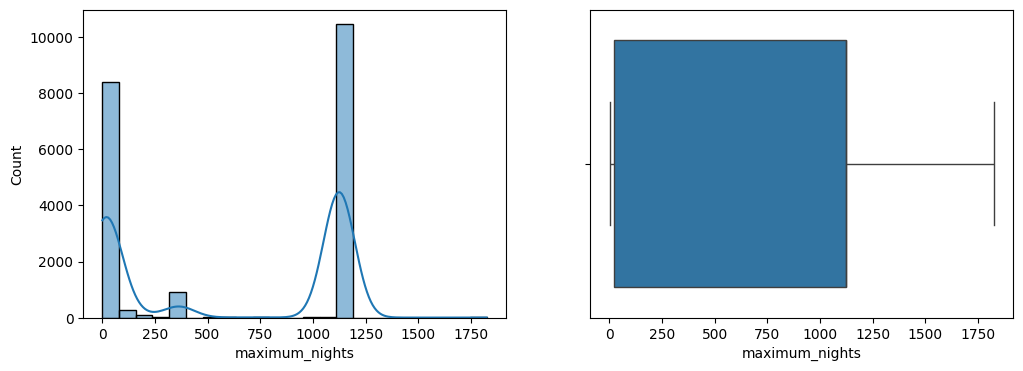

analyzing:review_scores_rating


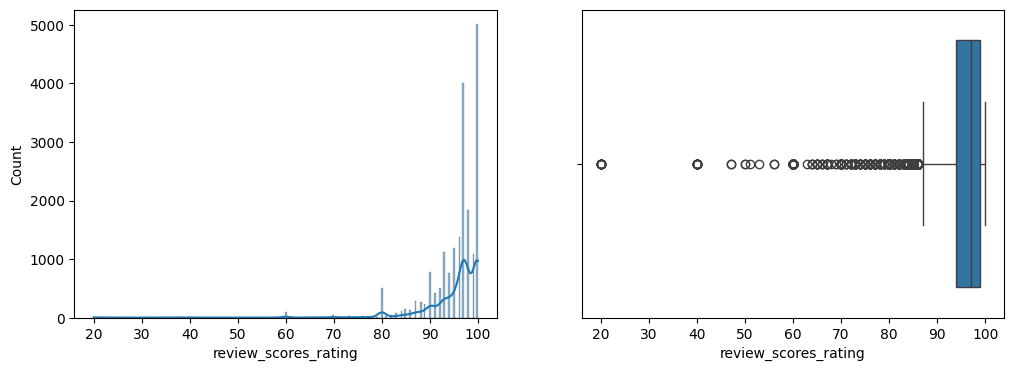

analyzing:availability_365


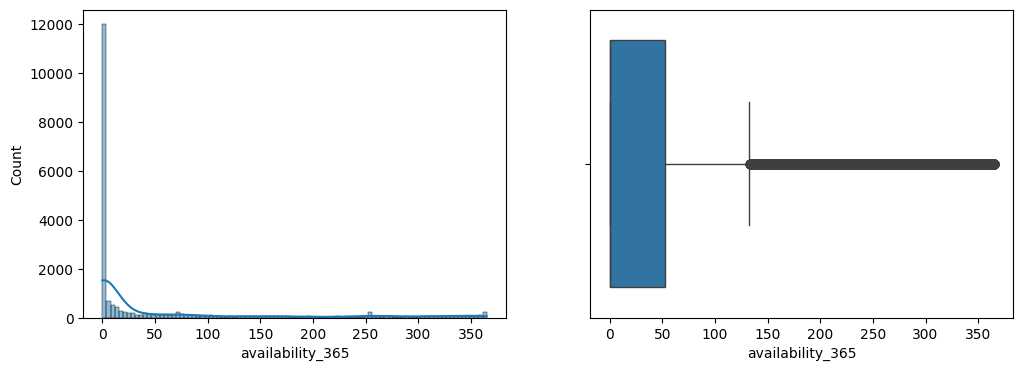

analyzing:number_of_reviews


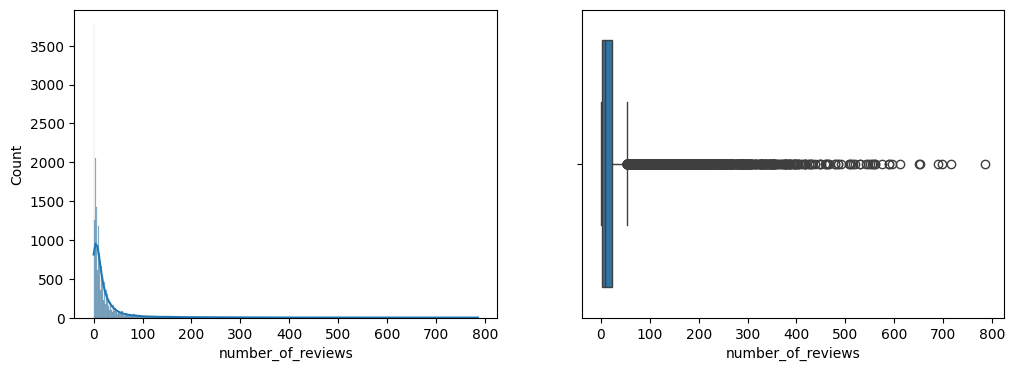

In [14]:
for col in numeric_cols:
    print(f"analyzing:{col}")
    fig ,ax = plt.subplots(1,2,figsize = (12,4))
    sns.histplot (data=listing,x=col , kde=True, ax= ax[0])
    sns.boxplot (data = listing, x= col , ax = ax[1])
    plt.show()

Mean vs Median: If they're different → skewed distribution

Standard Deviation: High std dev → wide spread of values

Min/Max: Check for impossible values (e.g., negative price)

Quartiles: Understand value ranges

Skewness ≈ 0: Normal distribution

Skewness > 1: Right-skewed (tail on right)

Skewness < -1: Left-skewed (tail on left)

Normal bell shape: Good for many models

Right-skewed: Common in prices, incomes → may need log transform

Left-skewed: Less common

Bimodal/Multimodal: Multiple peaks → might be different subgroups

Extreme outliers: Very long tails

Many points outside whiskers: Lots of outliers

Median line position: If not centered → skewed

Whisker length: Spread of "normal" data

Box size: IQR - where middle 50% of data lies

Points follow straight line: Normal distribution ✓

Points curve upward: Right skew
 
Points curve downward: Left skew

S-shaped curve: Heavy tails or light tails


count    20244.000000
mean       160.418149
std        162.974785
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64
skewness : 24.18


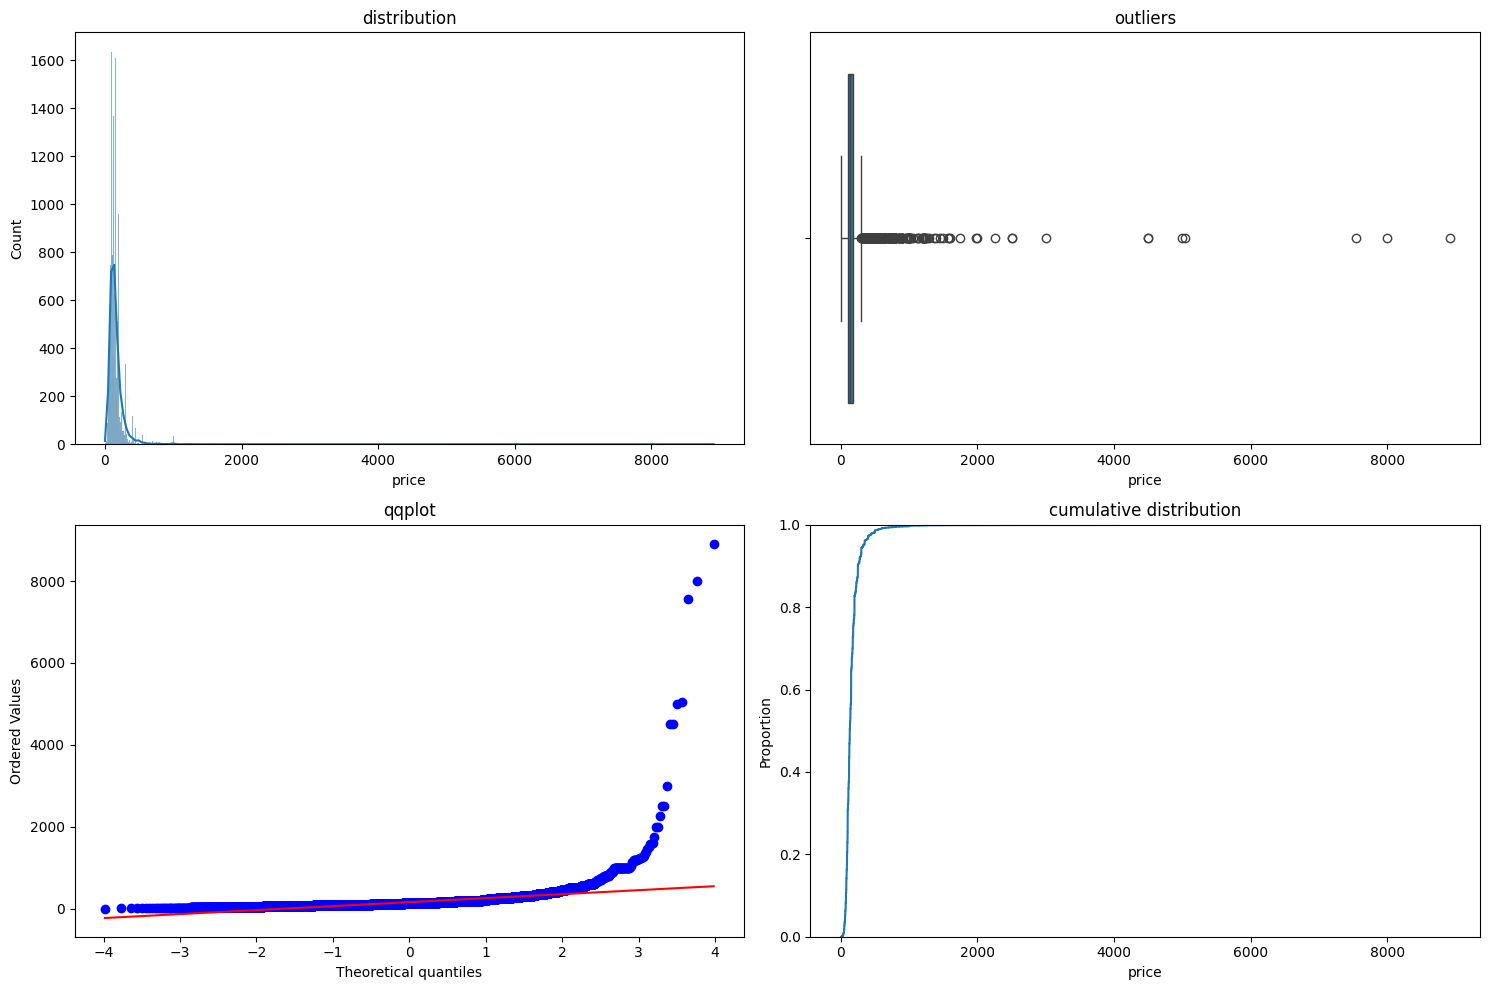

In [ ]:
listing['price'] = (
    listing['price'].astype(str).str.replace(r'[\$,]','',regex= True).astype(float)
)


target_col = 'price'

print (listing[target_col].describe())
print (f"skewness : {listing[target_col].skew() :.2f}")

fig,axes = plt.subplots(2,2,figsize = (15,10))
#distributiion
sns.histplot (data = listing , x = target_col , kde= True , ax = axes[0,0])
axes[0,0].set_title ("distribution")

 
sns.boxplot(data=listing,x=target_col, ax = axes[0,1])
axes[0,1].set_title('outliers')

#qq plot for normality check 
from scipy import stats
stats.probplot(listing[target_col].dropna(),dist='norm',plot = axes[1,0])
axes[1,0].set_title('qqplot')


#cumulative distribution

sns.ecdfplot(data = listing, x = target_col , ax = axes[1,1])
axes[1,1].set_title ('cumulative distribution')

plt.tight_layout()
plt.show()

Original Price Skewness: 24.18


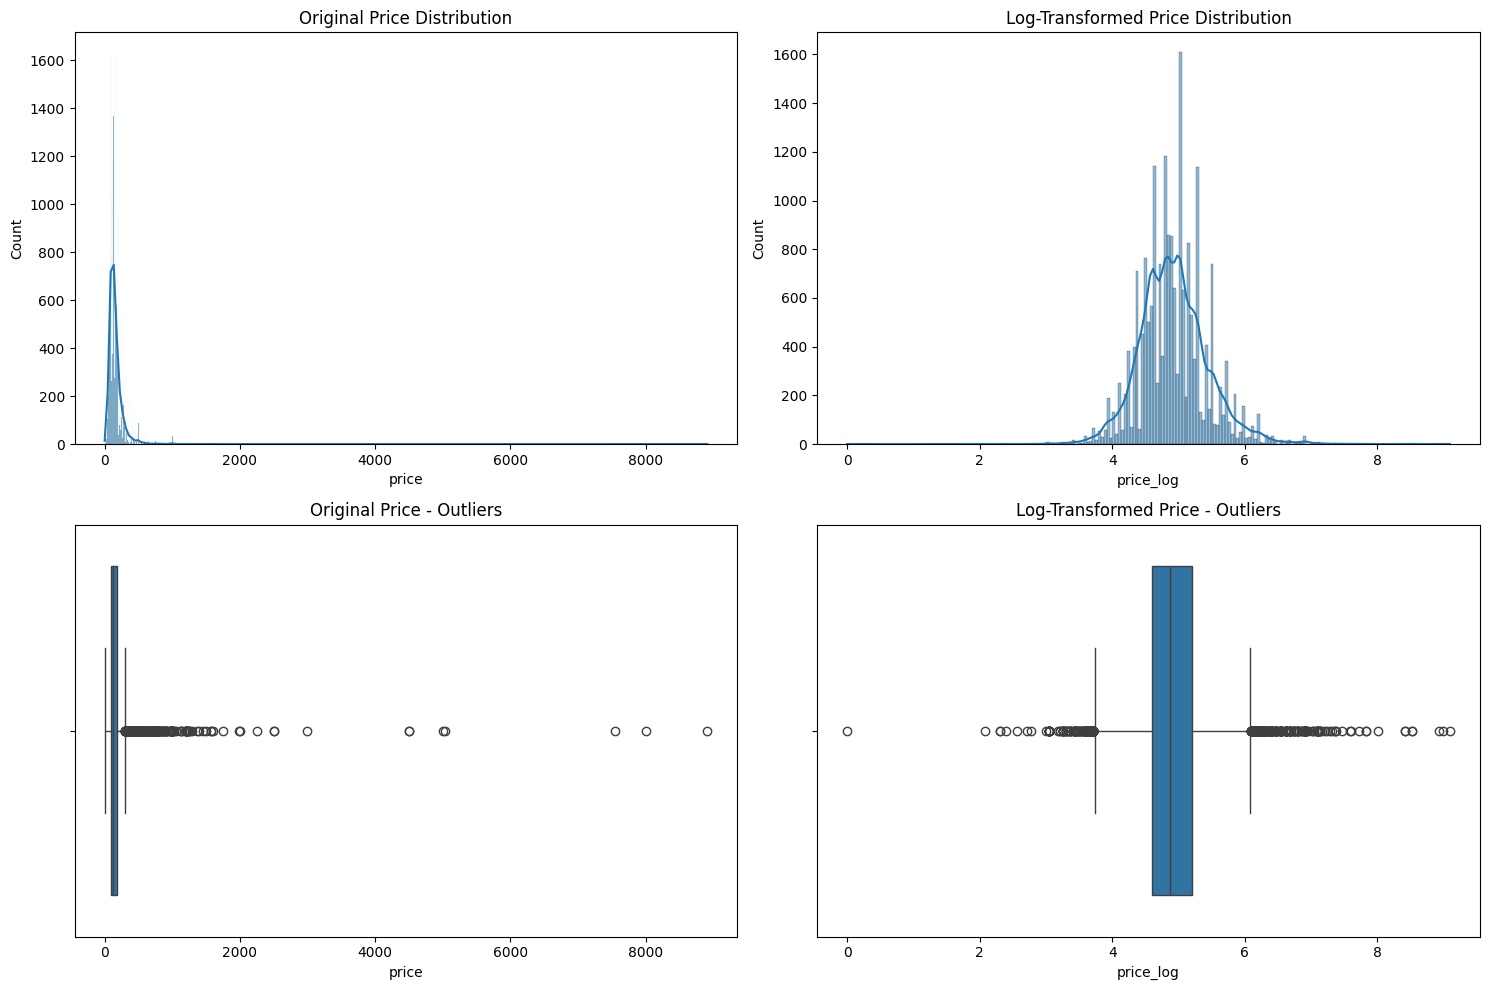

Log-Transformed Skewness: 0.52


In [16]:
# Check current skewness
print(f"Original Price Skewness: {listing['price'].skew():.2f}")

# Apply log transformation
listing['price_log'] = np.log1p(listing['price'])  # log(1+x) to handle zeros

# Compare distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original price
sns.histplot(data=listing, x='price', kde=True, ax=axes[0,0])
axes[0,0].set_title('Original Price Distribution')

# Log-transformed price
sns.histplot(data=listing, x='price_log', kde=True, ax=axes[0,1])
axes[0,1].set_title('Log-Transformed Price Distribution')

# Original boxplot
sns.boxplot(data=listing, x='price', ax=axes[1,0])
axes[1,0].set_title('Original Price - Outliers')

# Log-transformed boxplot
sns.boxplot(data=listing, x='price_log', ax=axes[1,1])
axes[1,1].set_title('Log-Transformed Price - Outliers')

plt.tight_layout()
plt.show()

print(f"Log-Transformed Skewness: {listing['price_log'].skew():.2f}")

In [17]:
# What makes these expensive listings special?
high_price_threshold = listing['price'].quantile(0.95)  # Top 5%
expensive_listings = listing[listing['price'] > high_price_threshold]

print("Characteristics of Top 5% Most Expensive Listings:")
print(f"Count: {len(expensive_listings)}")
print("\nProperty Types:")
print(expensive_listings['property_type'].value_counts())
print("\nRoom Types:")
print(expensive_listings['room_type'].value_counts())
print("\nAverage Accommodates:", expensive_listings['accommodates'].mean())
print("\nSuperhost Percentage:", expensive_listings['host_is_superhost'].value_counts(normalize=True))

Characteristics of Top 5% Most Expensive Listings:
Count: 1012

Property Types:
property_type
Apartment             580
House                 121
Townhouse              74
Loft                   47
Boat                   46
Houseboat              40
Serviced apartment     22
Condominium            16
Hostel                 15
Bed and breakfast      13
Aparthotel              9
Hotel                   8
Boutique hotel          7
Villa                   6
Guest suite             3
Guesthouse              2
Barn                    1
Lighthouse              1
Cottage                 1
Name: count, dtype: int64

Room Types:
room_type
Entire home/apt    922
Hotel room          46
Private room        42
Shared room          2
Name: count, dtype: int64

Average Accommodates: 4.733201581027668

Superhost Percentage: host_is_superhost
f    0.836795
t    0.163205
Name: proportion, dtype: float64


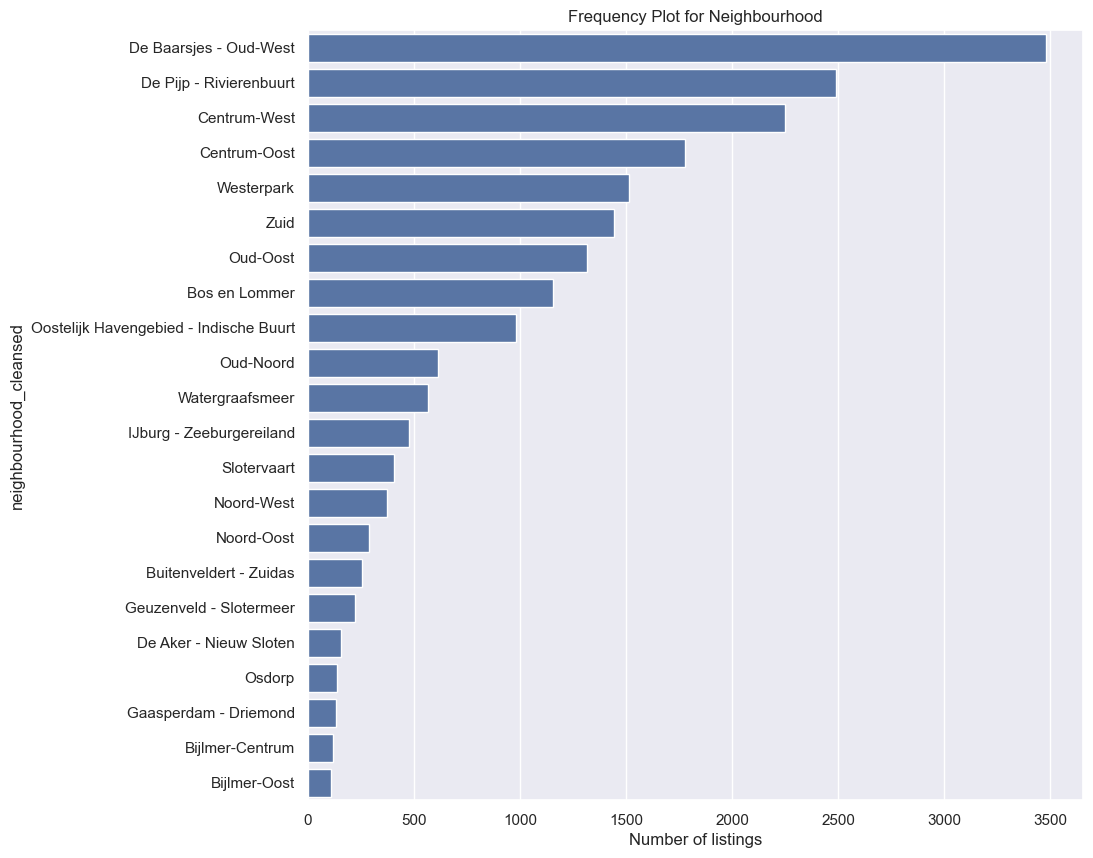

neighbourhood_cleansed
De Baarsjes - Oud-West                    3480
De Pijp - Rivierenbuurt                   2490
Centrum-West                              2249
Centrum-Oost                              1777
Westerpark                                1514
Zuid                                      1443
Oud-Oost                                  1315
Bos en Lommer                             1153
Oostelijk Havengebied - Indische Buurt     981
Oud-Noord                                  612
Watergraafsmeer                            566
IJburg - Zeeburgereiland                   478
Slotervaart                                406
Noord-West                                 372
Noord-Oost                                 287
Buitenveldert - Zuidas                     253
Geuzenveld - Slotermeer                    221
De Aker - Nieuw Sloten                     154
Osdorp                                     138
Gaasperdam - Driemond                      133
Bijlmer-Centrum                      

In [18]:
fig1 = plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.countplot(y='neighbourhood_cleansed', data = listing, order = listing['neighbourhood_cleansed'].value_counts().index)
plt.ylabel('neighbourhood_cleansed')
plt.xlabel('Number of listings')
plt.title('Frequency Plot for Neighbourhood')
plt.show()
listing['neighbourhood_cleansed'].value_counts()

Text(0.5, 1.0, 'Distribution of listings in different Neighbourhood')

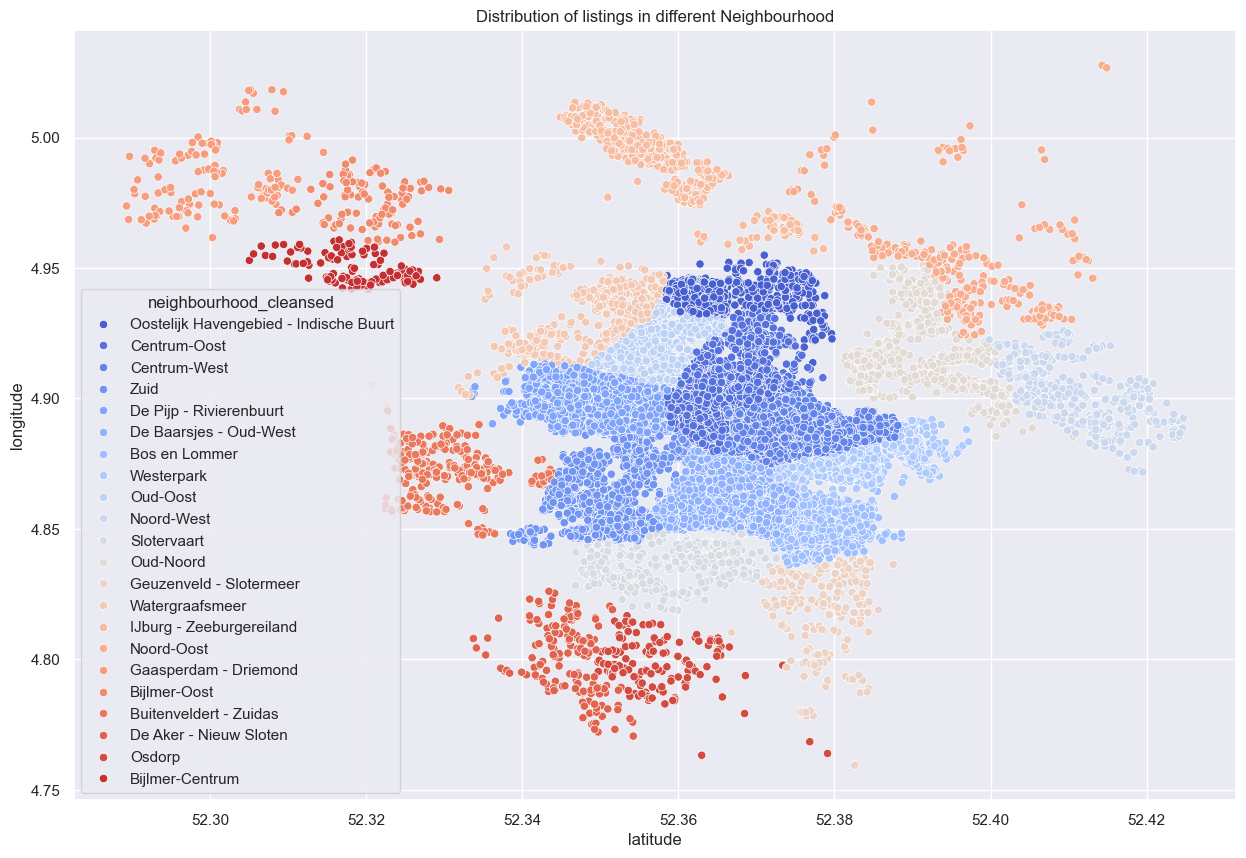

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='longitude',x='latitude',hue='neighbourhood_cleansed',palette="coolwarm",data = listing)
plt.title('Distribution of listings in different Neighbourhood')

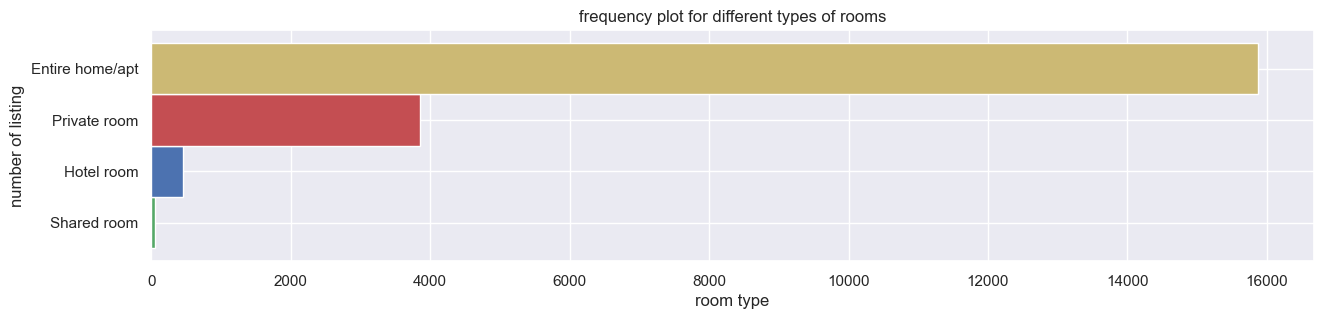

room_type
Entire home/apt    15880
Private room        3850
Hotel room           461
Shared room           53
Name: count, dtype: int64

In [20]:
#Room types
freq = listing['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize = (15,3),width = 1 , color=['g','b','r','y'])
plt.xlabel('room type')
plt.ylabel ('number of listing')
plt.title ("frequency plot for different types of rooms")
plt.show()
listing['room_type'].value_counts()

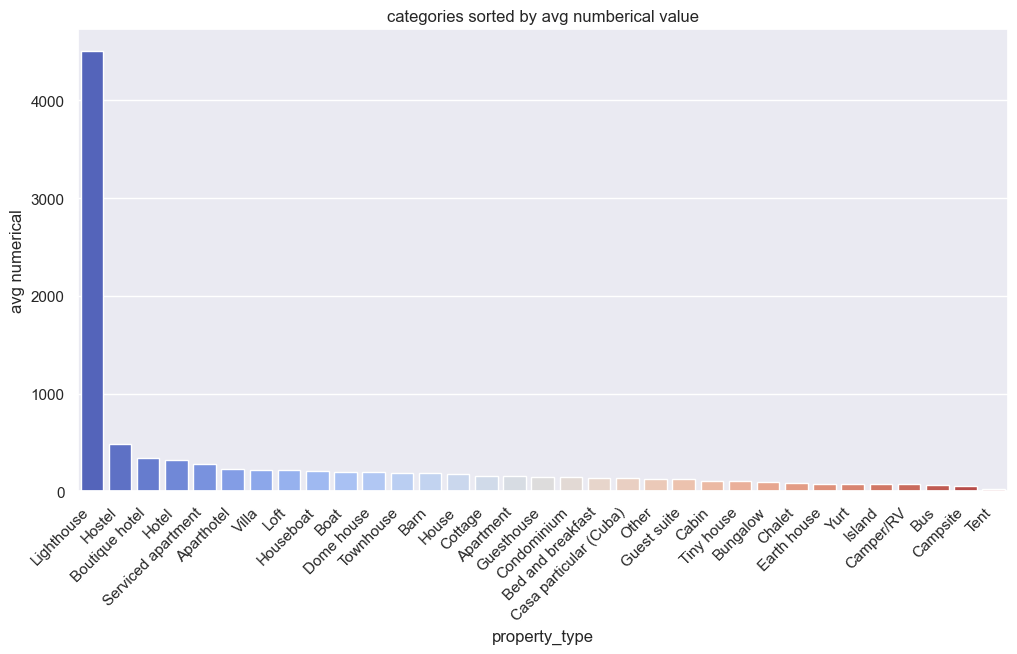

In [ ]:

category_means = listing.groupby('property_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x= category_means.index , y = category_means.values,palette='coolwarm')
plt.xticks (rotation = 45 , ha = 'right')
plt.title ("categories sorted by avg numberical value")
plt.ylabel ("avg numerical")
plt.show()

<Axes: xlabel='room_type', ylabel='price'>

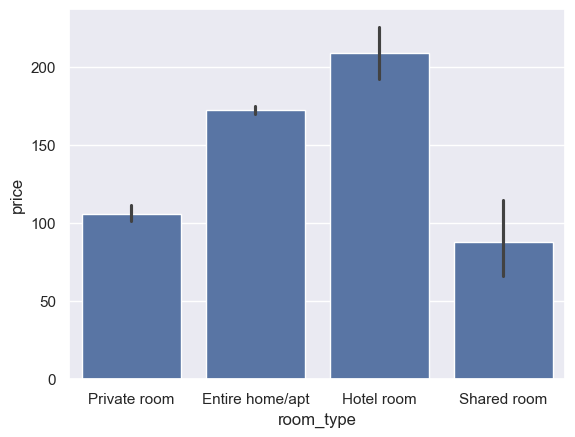

In [22]:
sns.barplot(data=listing, x='room_type', y='price', estimator='mean')


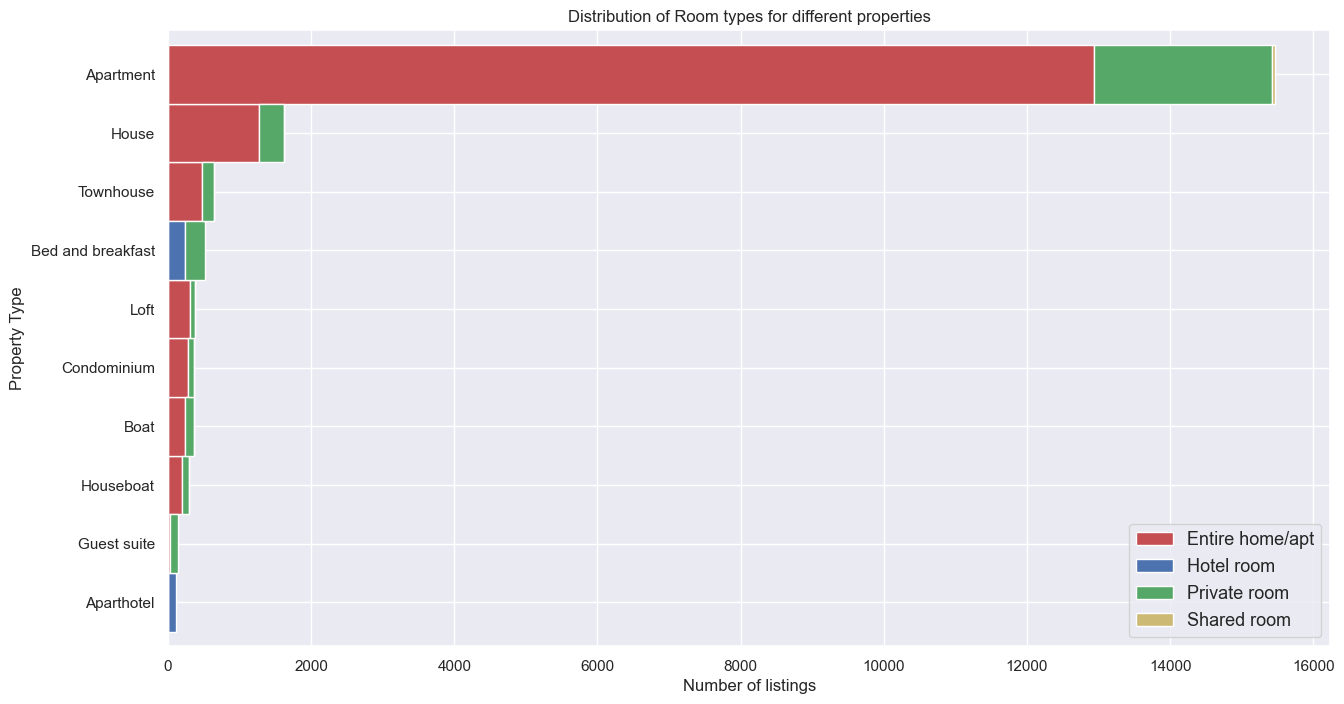

In [23]:
prop = listing.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g","y"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Distribution of Room types for different properties')
plt.xlabel('Number of listings')
plt.ylabel('Property Type')
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

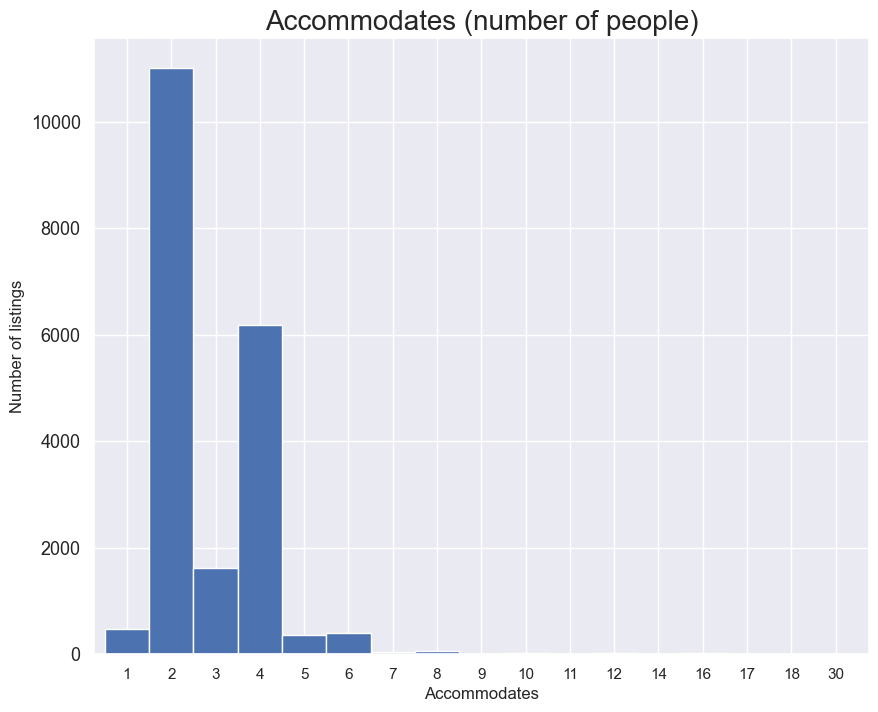

In [24]:
#Accomodates number of people
feq=listing['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

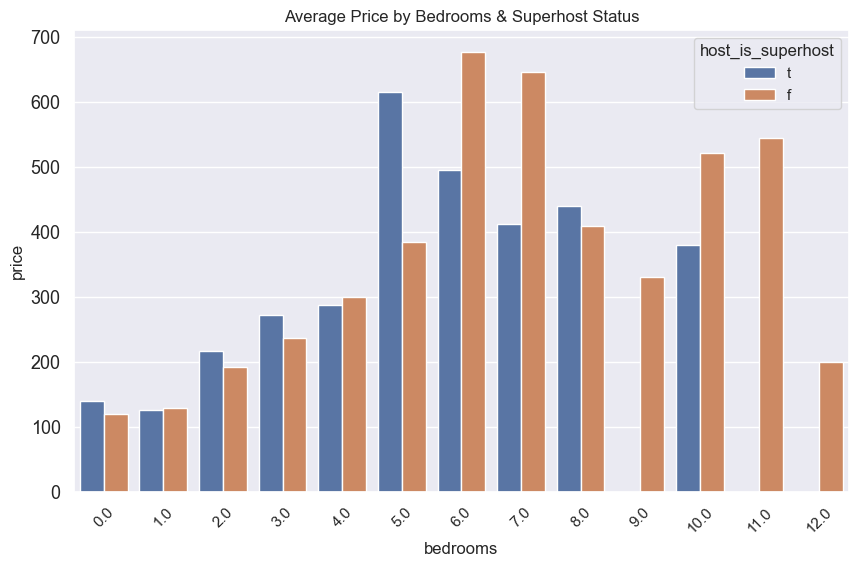

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=listing, x='bedrooms', y='price', hue='host_is_superhost', estimator='mean', errorbar=None)
plt.title('Average Price by Bedrooms & Superhost Status')
plt.xticks(rotation=45)
plt.show()


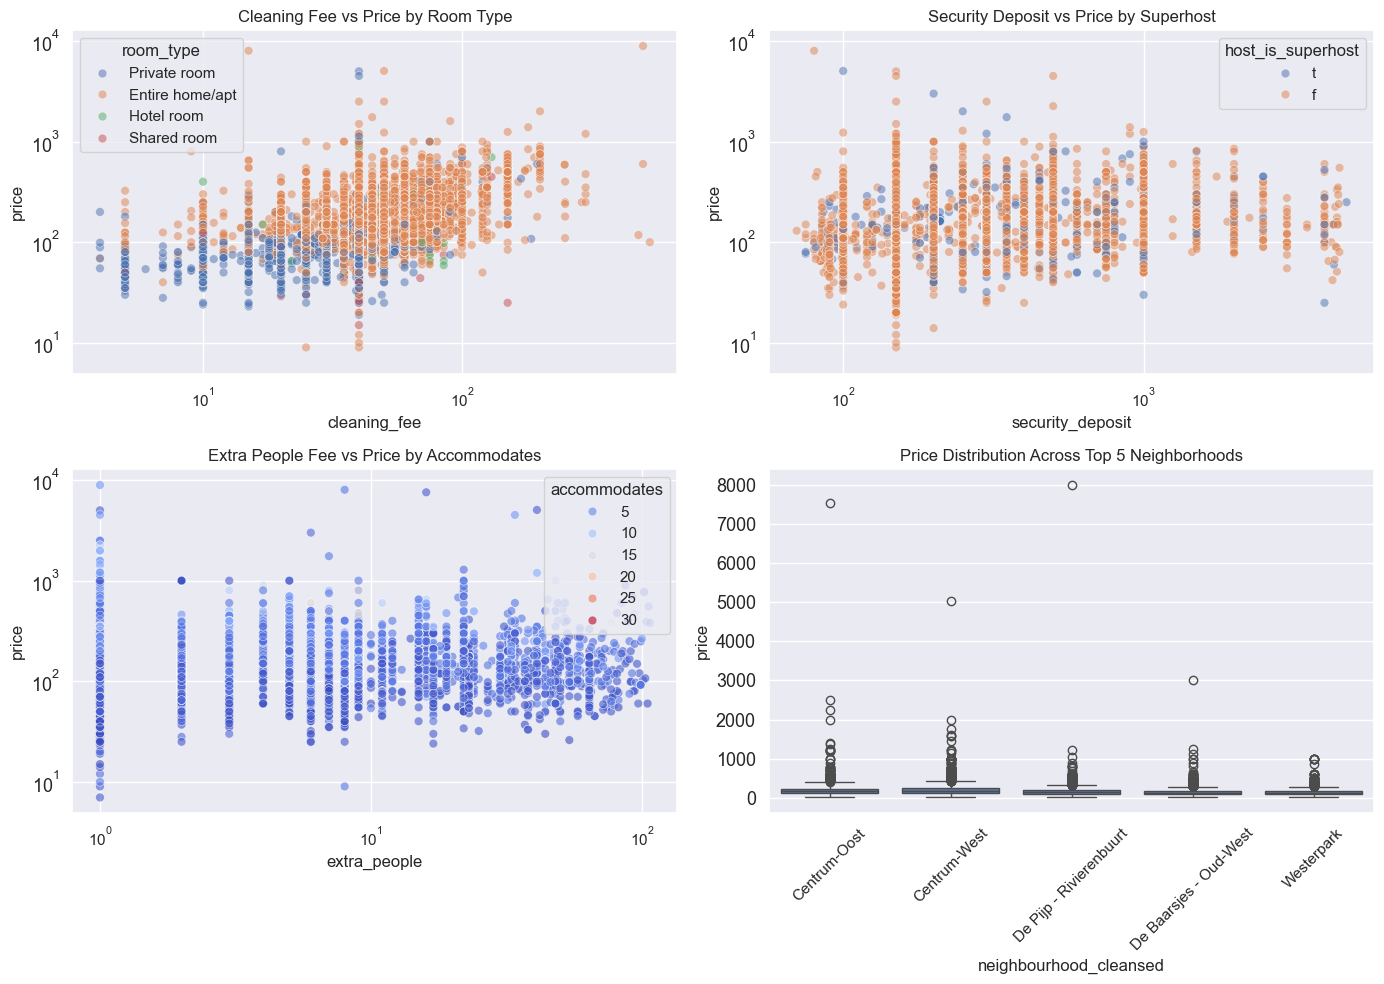

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=listing, x='cleaning_fee', y='price', hue='room_type', 
                alpha=0.5, s=40, ax=axes[0,0])
axes[0,0].set_title('Cleaning Fee vs Price by Room Type')
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')

sns.scatterplot(data=listing, x='security_deposit', y='price', hue='host_is_superhost', 
                alpha=0.5, s=40, ax=axes[0,1])
axes[0,1].set_title('Security Deposit vs Price by Superhost')
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')

sns.scatterplot(data=listing, x='extra_people', y='price', hue='accommodates', 
                palette='coolwarm', alpha=0.6, s=40, ax=axes[1,0])
axes[1,0].set_title('Extra People Fee vs Price by Accommodates')
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')

top_neigh = listing['neighbourhood_cleansed'].value_counts().head(5).index
sns.boxplot(data=listing[listing['neighbourhood_cleansed'].isin(top_neigh)],
            x='neighbourhood_cleansed', y='price', ax=axes[1,1])
axes[1,1].set_title('Price Distribution Across Top 5 Neighborhoods')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


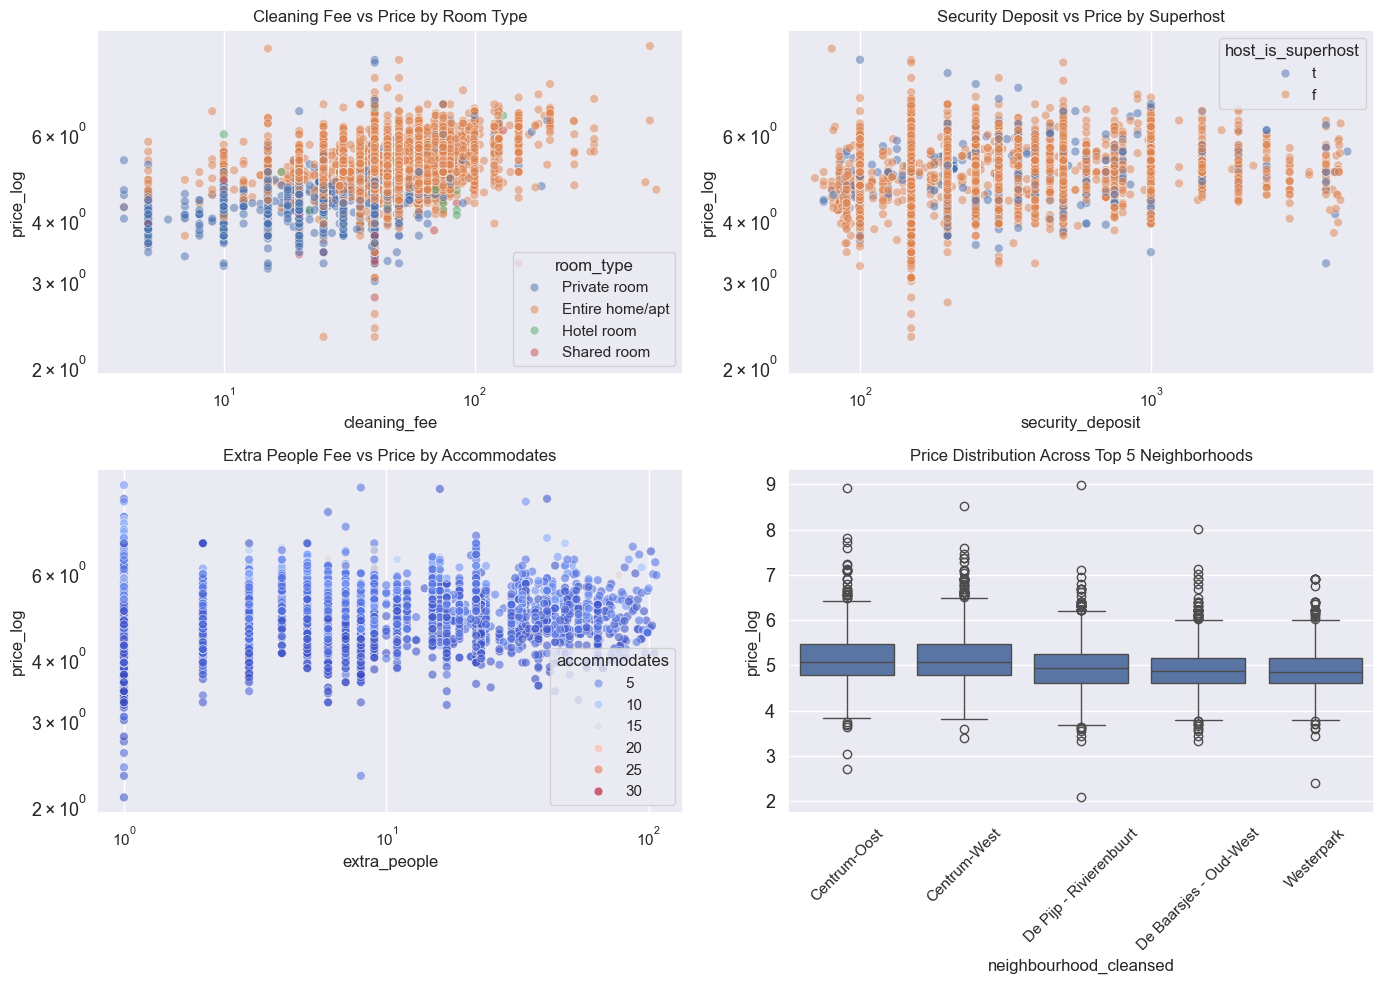

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=listing, x='cleaning_fee', y='price_log', hue='room_type', 
                alpha=0.5, s=40, ax=axes[0,0])
axes[0,0].set_title('Cleaning Fee vs Price_log by Room Type')
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')

sns.scatterplot(data=listing, x='security_deposit', y='price_log', hue='host_is_superhost', 
                alpha=0.5, s=40, ax=axes[0,1])
axes[0,1].set_title('Security Deposit vs Price_log by Superhost')
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')

sns.scatterplot(data=listing, x='extra_people', y='price_log', hue='accommodates', 
                palette='coolwarm', alpha=0.6, s=40, ax=axes[1,0])
axes[1,0].set_title('Extra People Fee vs Price_log by Accommodates')
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')

top_neigh = listing['neighbourhood_cleansed'].value_counts().head(5).index
sns.boxplot(data=listing[listing['neighbourhood_cleansed'].isin(top_neigh)],
            x='neighbourhood_cleansed', y='price_log', ax=axes[1,1])
axes[1,1].set_title('Price Distribution Across Top 5 Neighborhoods')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

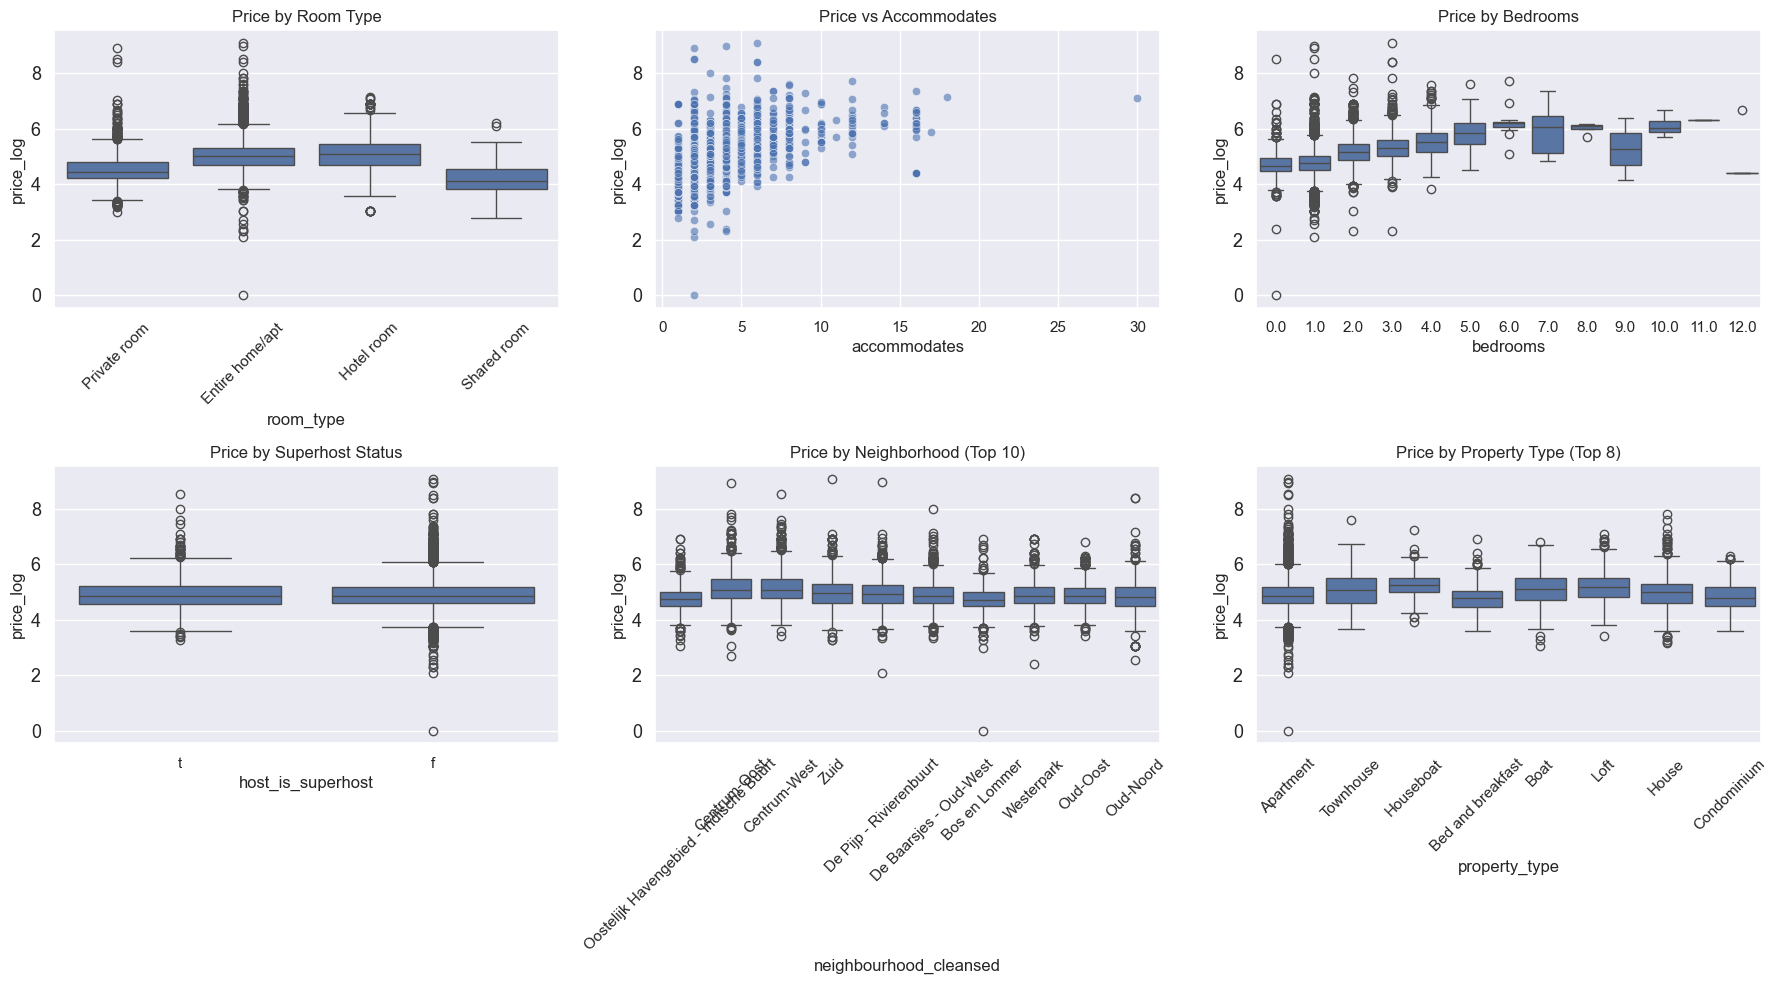

In [27]:
# 1. Price vs Property Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Room Type vs Price
sns.boxplot(data=listing, x='room_type', y='price_log', ax=axes[0,0])
axes[0,0].set_title('Price by Room Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Accommodates vs Price
sns.scatterplot(data=listing, x='accommodates', y='price_log', alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Price vs Accommodates')

# Bedrooms vs Price
sns.boxplot(data=listing, x='bedrooms', y='price_log', ax=axes[0,2])
axes[0,2].set_title('Price by Bedrooms')

# Superhost vs Price
sns.boxplot(data=listing, x='host_is_superhost', y='price_log', ax=axes[1,0])
axes[1,0].set_title('Price by Superhost Status')

# Neighborhood (top 10) vs Price
top_neighborhoods = listing['neighbourhood_cleansed'].value_counts().head(10).index
sns.boxplot(data=listing[listing['neighbourhood_cleansed'].isin(top_neighborhoods)], 
            x='neighbourhood_cleansed', y='price_log', ax=axes[1,1])
axes[1,1].set_title('Price by Neighborhood (Top 10)')
axes[1,1].tick_params(axis='x', rotation=45)

# Property Type (top 8) vs Price
top_properties = listing['property_type'].value_counts().head(8).index
sns.boxplot(data=listing[listing['property_type'].isin(top_properties)], 
            x='property_type', y='price_log', ax=axes[1,2])
axes[1,2].set_title('Price by Property Type (Top 8)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

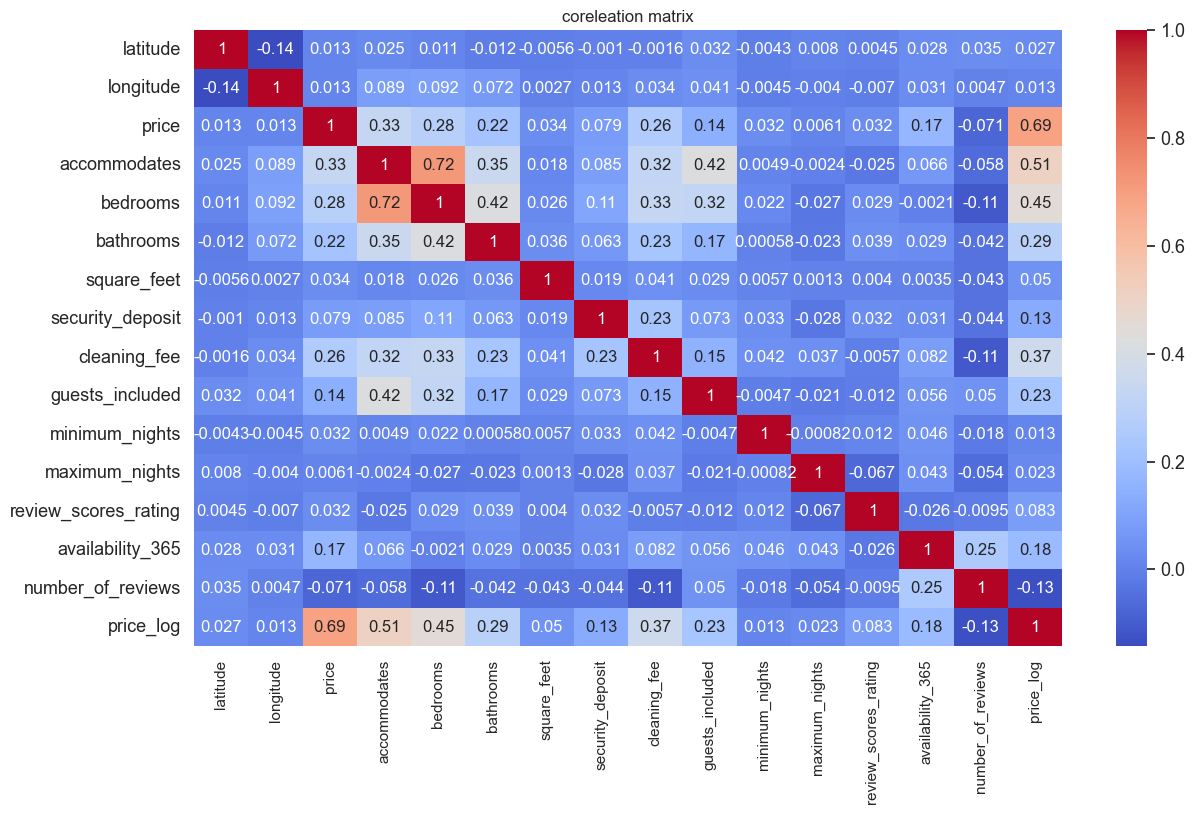

In [34]:
numeric_cols = listing.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()


plt.figure(figsize=(14,8))
sns.heatmap (corr_matrix,annot=True,cmap='coolwarm')
plt.title("coreleation matrix")
plt.show()





In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = listing.select_dtypes(include=['number']).drop(columns=['price_log'])
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data)

                 Feature           VIF
0               latitude  18798.659063
1              longitude  18547.937689
2                  price      2.385795
3           accommodates     13.661448
4               bedrooms      8.264530
5              bathrooms     12.695758
6            square_feet     51.864737
7       security_deposit      1.509049
8           cleaning_fee      4.959558
9        guests_included      4.207905
10        minimum_nights      1.052645
11        maximum_nights      2.327963
12  review_scores_rating    240.140044
13      availability_365      1.444587
14     number_of_reviews      1.366149



 Interpretation

VIF < 5 → good

5 ≤ VIF < 10 → moderate multicollinearity

VIF ≥ 10 → high multicollinearity → drop or combine such features
 
 High VIF means feature redundancy
 
 one column can be predicted from others.

 
Example:

latitude ↔ longitude (geographical pair)

square_feet ↔ accommodates, bedrooms, bathrooms

review_scores_rating ↔ number_of_reviews

In [40]:
listing.head(4)

,host_name,host_is_superhost,host_identity_verified,latitude,longitude,neighbourhood_cleansed,price,property_type,room_type,accommodates,...,minimum_nights,maximum_nights,review_scores_rating,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price_log
0,Daniel,t,f,52.36575,4.94142,Oostelijk Havengebied - Indische Buurt,59.0,Apartment,Private room,2,...,3,15,98.0,70,269,t,strict_14_with_grace_period,f,f,4.094345
1,Alexander,f,f,52.36509,4.89354,Centrum-Oost,80.0,Townhouse,Private room,2,...,1,1000,88.0,167,288,f,strict_14_with_grace_period,f,f,4.394449
2,Joan,f,f,52.37297,4.88339,Centrum-West,125.0,Apartment,Entire home/apt,3,...,14,60,100.0,58,3,f,strict_14_with_grace_period,f,f,4.836282
3,Flip,t,t,52.38673,4.89208,Centrum-West,155.0,Houseboat,Private room,2,...,2,730,99.0,264,200,t,strict_14_with_grace_period,f,f,5.049856


In [41]:
drop_features = ['latitude', 'longitude', 'square_feet', 'review_scores_rating']
reduced_df = numeric_df.drop(columns=drop_features)


In [42]:
vif_data = pd.DataFrame()
vif_data["Feature"] = reduced_df.columns
vif_data["VIF"] = [variance_inflation_factor(reduced_df.values, i)
                   for i in range(reduced_df.shape[1])]
print(vif_data)


              Feature        VIF
0               price   2.376875
1        accommodates  12.869209
2            bedrooms   8.059404
3           bathrooms   7.814930
4    security_deposit   1.500060
5        cleaning_fee   4.765009
6     guests_included   4.105421
7      minimum_nights   1.049729
8      maximum_nights   2.096677
9    availability_365   1.442432
10  number_of_reviews   1.323832


In [47]:
# Numeric columns (after dropping high-VIF ones)
final_numeric_cols = ['price_log', 'accommodates', 'bedrooms', 'bathrooms',
                      'security_deposit', 'cleaning_fee', 'guests_included',
                      'minimum_nights', 'maximum_nights', 'availability_365',
                      'number_of_reviews']

# Categorical columns
categorical_cols = ['room_type', 'property_type', 'neighbourhood_cleansed', 'cancellation_policy']

# Combine
final_df = listing[final_numeric_cols + categorical_cols]


In [48]:
final_df.head(5)

,price_log,accommodates,bedrooms,bathrooms,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,room_type,property_type,neighbourhood_cleansed,cancellation_policy
0,4.094345,2,1.0,1.5,200.0,60.0,1,3,15,70,269,Private room,Apartment,Oostelijk Havengebied - Indische Buurt,strict_14_with_grace_period
1,4.394449,2,1.0,1.0,150.0,40.0,2,1,1000,167,288,Private room,Townhouse,Centrum-Oost,strict_14_with_grace_period
2,4.836282,3,1.0,1.0,300.0,40.0,2,14,60,58,3,Entire home/apt,Apartment,Centrum-West,strict_14_with_grace_period
3,5.049856,2,1.0,1.0,0.0,0.0,1,2,730,264,200,Private room,Houseboat,Centrum-West,strict_14_with_grace_period
4,4.330733,2,1.0,1.0,150.0,40.0,1,2,1825,123,295,Private room,Apartment,Centrum-West,moderate


In [50]:
encoded_df = pd.get_dummies(final_df,columns=categorical_cols,drop_first=True).astype(int)
encoded_df.head(5)

,price_log,accommodates,bedrooms,bathrooms,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_365,...,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,4,2,1,1,200,60,1,3,15,70,...,0,0,0,0,0,0,0,1,0,0
1,4,2,1,1,150,40,2,1,1000,167,...,0,0,0,0,0,0,0,1,0,0
2,4,3,1,1,300,40,2,14,60,58,...,0,0,0,0,0,0,0,1,0,0
3,5,2,1,1,0,0,1,2,730,264,...,0,0,0,0,0,0,0,1,0,0
4,4,2,1,1,150,40,1,2,1825,123,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# Target
y = listing['price_log']   # log-transformed price

# Features: all columns in encoded_df (numeric + encoded categorical)
X = encoded_df.copy()  

# Identify numeric columns (original numeric features)
numeric_cols = ['accommodates','bedrooms','bathrooms','security_deposit',
                'cleaning_fee','guests_included','minimum_nights','maximum_nights',
                'availability_365','number_of_reviews']

# Scale numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [62]:
X_train.shape 
y_train.shape


(14170,)

In [63]:
X_test.shape
y_test.shape

(6074,)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 score: 0.8104705701227666
RMSE: 0.2263471888403816


In [ ]:
# Calculate additional metrics for complete picture
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape*100:.2f}%")  

# Compare RMSE to target variable statistics
print(f"Target Mean: {y_test.mean()}")
print(f"Target Std: {y_test.std()}")
print(f"RMSE/Target Mean: {(mean_squared_error(y_test, y_pred, squared=False)/y_test.mean())*100:.2f}%")

MAE: 0.1802683350034396
MAPE: 3.67%
Target Mean: 4.924250552313864
Target Std: 0.5199631070101487
RMSE/Target Mean: 4.60%


| Metric       | Value   | Benchmark | Status      | Interpretation                   |
|-------------|--------|-----------|------------|----------------------------------|
| R² Score    | 0.8105 | > 0.70    | Excellent | Explains 81.05% of variance     |
| RMSE/Mean   | 4.60%  | < 10%     | Outstanding | Very low relative error         |
| MAE         | 0.1803 | < 0.25    | Excellent | Small absolute errors            |
| MAPE        | 3.67%  | < 10%     |  Outstanding | Exceptional accuracy            |

 